<a href="https://colab.research.google.com/github/celinascaglione/trabajos/blob/main/tpCelina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP FINAL: CELINA GABRIELA SCAGLIONE Utilizando los datos de vinos obtenidos del siguiente dataset: from sklearn.datasets import load_wine 1)Construya 2 datasets, uno con los datos originales y otro con los datos correctamente escalados y/o normalizados. Divida ambos datasets en conjuntos de entrenamiento y de validación

In [1]:
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics


#Carga del dataset de los vinos (dataset original)
vinos = load_wine()
x = vinos.data
y = vinos.target

# Dividimos al dataset en grupos de entrenamiento y validación(test)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=7)

# Escalar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividimos ahora, los datos escalados en grupos de entrenamiento y validación
x_train_scaled, x_val_scaled, y_train_scaled, y_val_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=7)

2)Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. Evalúe la precisión en ambos casos.

En este caso voy a tomar algunos valores de K, para saber qué valor de K es el más conveniente y poderlos comparar entre sí.

In [2]:
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1,8):
    knnorig = neighbors.KNeighborsClassifier(n_neighbors=k)
    knnorig.fit(x_train, y_train)
    predicciones=knnorig.predict(x_val)
    eficacia = knnorig.score(x_val, y_val)
    print(f'La precisión de KNN en el dataset original con un valor de k de {k} es de: {eficacia}')

La precisión de KNN en el dataset original con un valor de k de 1 es de: 0.6666666666666666
La precisión de KNN en el dataset original con un valor de k de 2 es de: 0.5833333333333334
La precisión de KNN en el dataset original con un valor de k de 3 es de: 0.6666666666666666
La precisión de KNN en el dataset original con un valor de k de 4 es de: 0.6111111111111112
La precisión de KNN en el dataset original con un valor de k de 5 es de: 0.6388888888888888
La precisión de KNN en el dataset original con un valor de k de 6 es de: 0.6944444444444444
La precisión de KNN en el dataset original con un valor de k de 7 es de: 0.6944444444444444


In [3]:
for k in range(1,8):
    knn_norm = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_norm.fit(x_train_scaled, y_train_scaled)
    predicciones_norm=knn_norm.predict(x_val_scaled)
    eficacia = knn_norm.score(x_val_scaled, y_val_scaled)
    print(f'La precisión para el dataset normalizado con un valor de {k} es de: {eficacia}')

La precisión para el dataset normalizado con un valor de 1 es de: 0.9722222222222222
La precisión para el dataset normalizado con un valor de 2 es de: 1.0
La precisión para el dataset normalizado con un valor de 3 es de: 1.0
La precisión para el dataset normalizado con un valor de 4 es de: 0.9722222222222222
La precisión para el dataset normalizado con un valor de 5 es de: 1.0
La precisión para el dataset normalizado con un valor de 6 es de: 0.9444444444444444
La precisión para el dataset normalizado con un valor de 7 es de: 1.0


Para el dataset sin escalar el valor de k=6 ó k=7, es el más eficiente, siendo la precisión de 0.694444. Para el dataset normalizado, el valor de K más adecuado serían los que dan una eficiencia de 1 (k=2, k=3, k=5 ó k=7). Sino, se eligen aquellos que superen el 0.95. Como es un dataset chico, no con grandes cantidades de datos, se pudo utilizar k con un rango del 1 al 8, y se pudieron observar precisiones de 1.0.

3)Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos datasets. Evalúe la precisión en ambos casos.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_tree_train, x_tree_test, y_tree_train, y_tree_test=train_test_split(x, y) #conjunto de datos sin escalar
xs_tree_train, xs_tree_test, ys_tree_train, ys_tree_test=train_test_split(x_scaled, y) #conjunto de datos escalados

#Entrenamiento de árbol de decisión con los datos origanles.
arbol = DecisionTreeClassifier(max_depth=4)
arbol.fit(x_tree_train, y_tree_train)

#Datos escalados, entrenamiento:

arbol_scaled = DecisionTreeClassifier(max_depth=4)
arbol_scaled.fit(xs_tree_train, ys_tree_train)

arbol.score(x_tree_test, y_tree_test)

0.9333333333333333

In [5]:
arbol_scaled.score(xs_tree_test, ys_tree_test)

0.9111111111111111

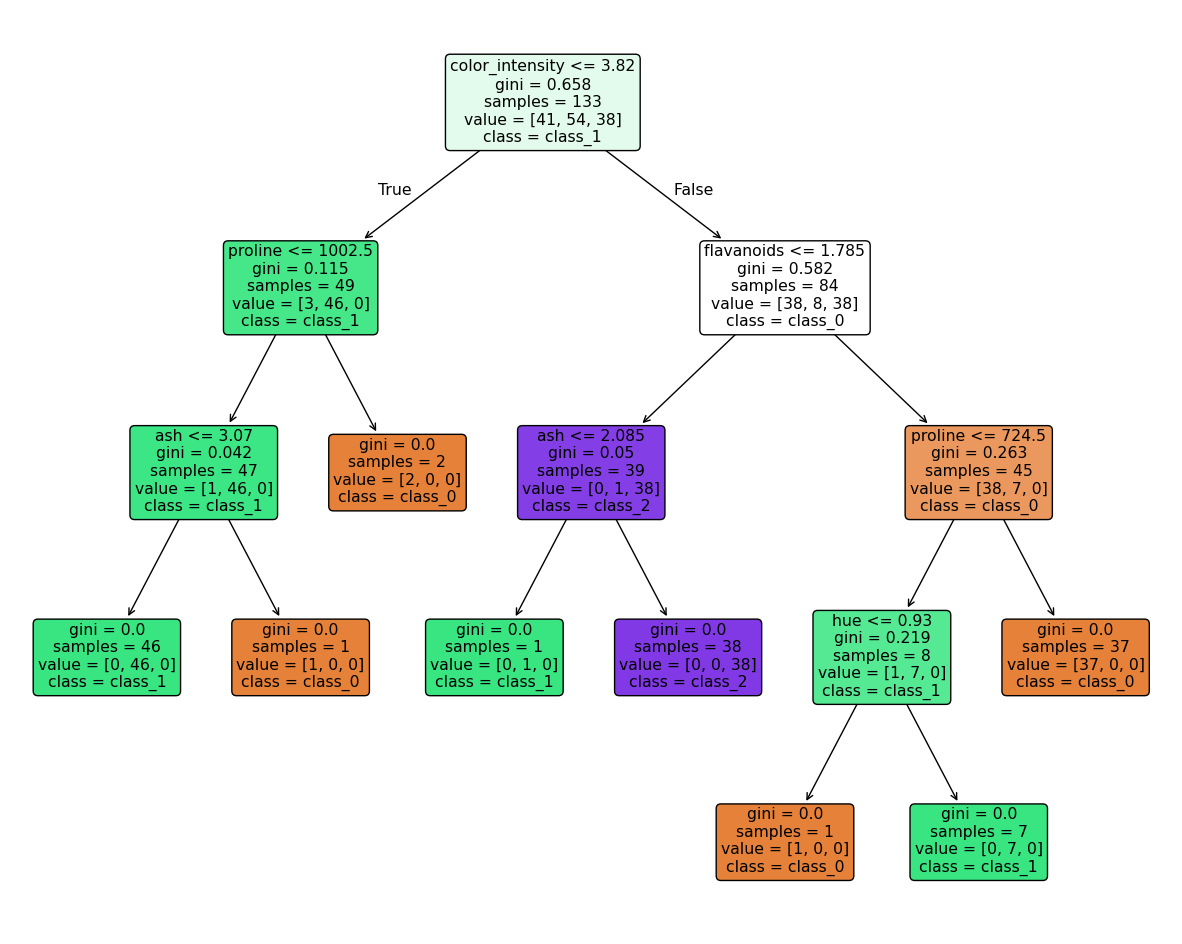

In [6]:
feature_names = vinos.feature_names
class_names = vinos.target_names.tolist()
plt.figure(figsize=(15, 12))
plot_tree(arbol, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

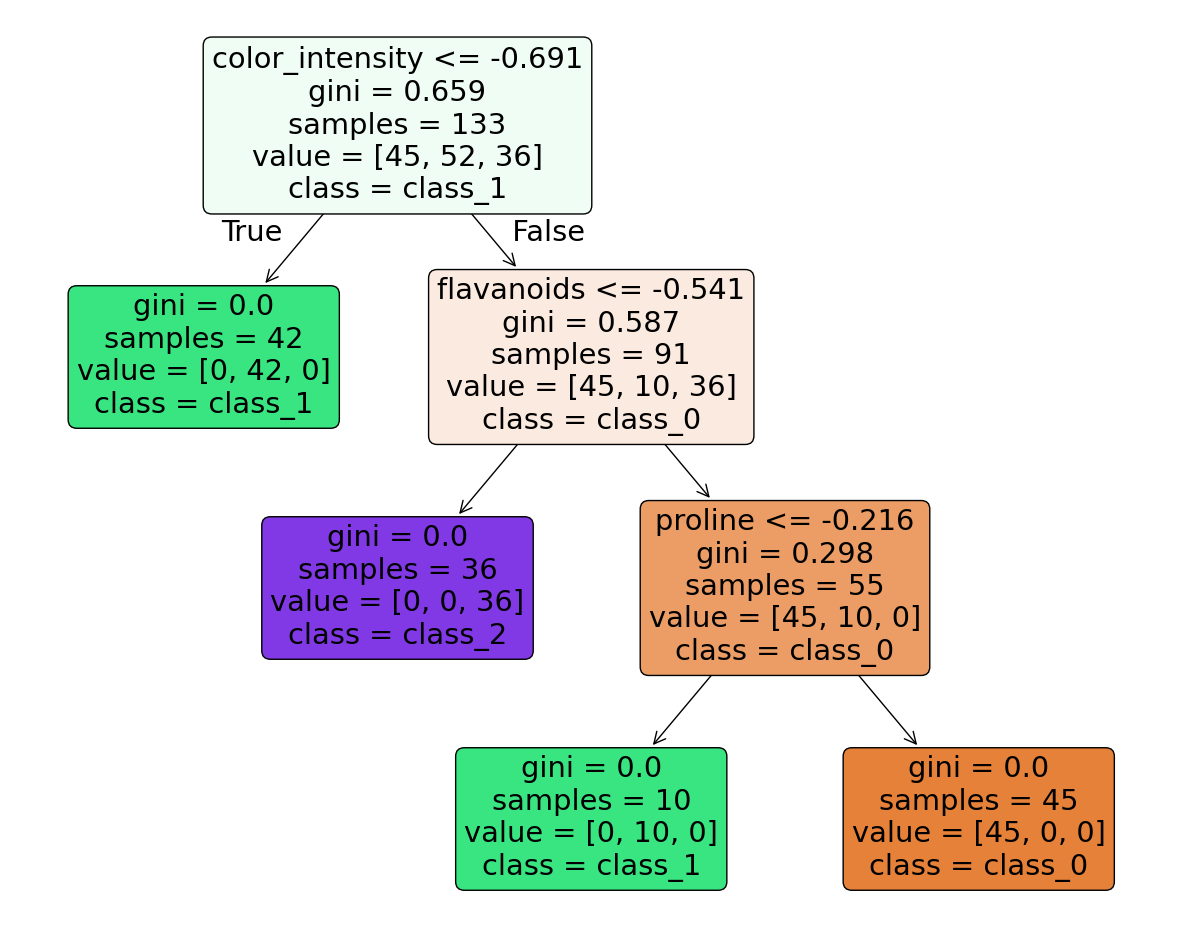

In [7]:
plt.figure(figsize=(15, 12))
plot_tree(arbol_scaled, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

4)Tome los datos escalados y/o normalizados, reduzca la dimensión del problema a 2 utilizando PCA y grafique el conjunto resultante.


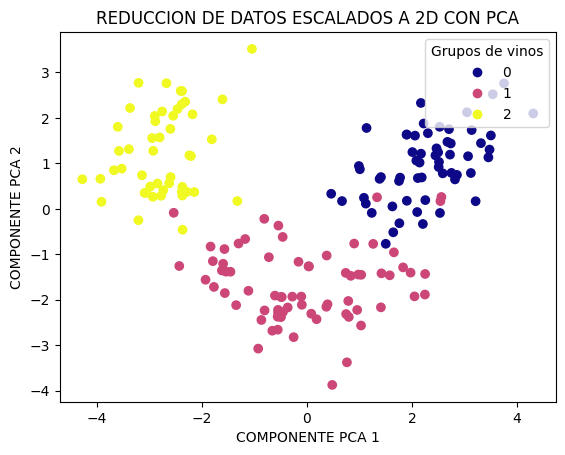

In [8]:
from sklearn.decomposition import PCA

# Ajusto el modelo PCA a los datos escalados
pca = PCA(n_components=2)
x_2D = pca.fit_transform(x_scaled)

scatter = plt.scatter(x_2D[:, 0], x_2D[:, 1], c=y, cmap='plasma')
plt.title("REDUCCION DE DATOS ESCALADOS A 2D CON PCA")
plt.xlabel("COMPONENTE PCA 1")
plt.ylabel("COMPONENTE PCA 2")
plt.legend(*scatter.legend_elements(), title="Grupos de vinos", loc='upper right')
plt.show()

De esta manera podemos observar que existen 3 clusters en los datos escalados, hay algunos elementos que se superponen, pero claramente los podemos visualizar en el gráfico.

5)Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de KMeans sobre los datos transformados por PCA. Repita el procedimiento utilizando KMeans por mini-batches

Precisión para K-Means:  0.8950582389649661


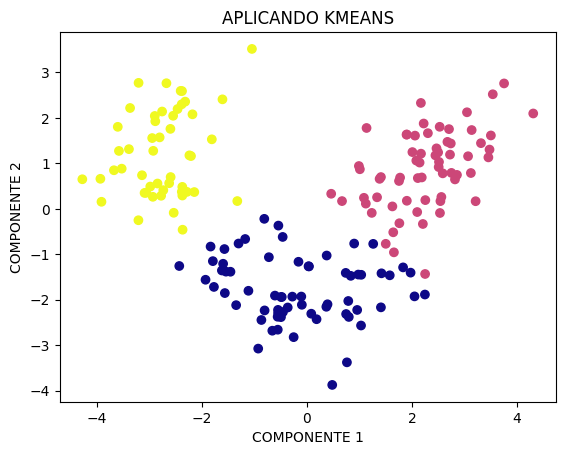

In [9]:
# Aplicar KMeans sobre los datos transformados por PCA
# Elijo un valor de K (número de clusters, porque son 3 grupos de vinos).
import os
os.environ["OMP_NUM_THREADS"] = "1"

kmeans = KMeans(n_init=10, n_clusters=3, max_iter=500)
kmeans.fit(x_2D)
predicciones_kmeans=kmeans.predict(x_2D)

score_kmeans=metrics.adjusted_rand_score(y, predicciones_kmeans)
print("Precisión para K-Means: ",score_kmeans)

plt.scatter(x_2D[:, 0], x_2D[:, 1], c=predicciones_kmeans, cmap='plasma')
plt.title("APLICANDO KMEANS")
plt.xlabel("COMPONENTE 1")
plt.ylabel("COMPONENTE 2")
plt.show()

Precisión en Mini-Batch K-Means:  0.8961288077970022


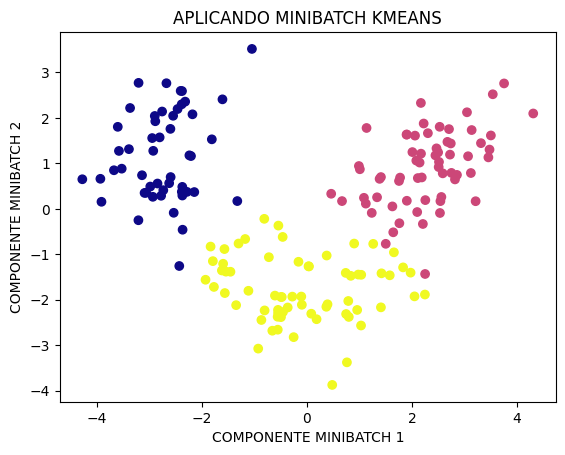

In [10]:
# Realizar clustering de los datos con Mini-Batch K-Means

mini_batch = MiniBatchKMeans(n_clusters=3, max_iter=500) #, batch_size=3072)

mini_batch.fit(x_2D)
predicciones_minibatch=mini_batch.predict(x_2D)

score_minibatch=metrics.adjusted_rand_score(y, predicciones_minibatch)
print("Precisión en Mini-Batch K-Means: ",score_minibatch)

plt.scatter(x_2D[:, 0], x_2D[:, 1], c=predicciones_minibatch, cmap='plasma')
plt.title("APLICANDO MINIBATCH KMEANS")
plt.xlabel("COMPONENTE MINIBATCH 1")
plt.ylabel("COMPONENTE MINIBATCH 2")
plt.show()

En ambos casos se utiliza K=3, ya que son 3 grupos de vinos(clusters), ambos métodos reproducen clusters muy similares. Los valores de los scores para los mismos, son muy cercanos, aunque pueden existir mínimas diferencias.

De acuerdo a los resultados obtenidos, podemos encontrar que el árbol de decisiones con un max_depth=4, tienen un rendimiento ligeramente superior el dataset escalado en el árbol, con respecto al dataset original. Sí hay diferencia más marcada, observada cuando utilizamos el método KNN,siendo mejor el escalado, con respecto al dataset original.